In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os,glob

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [4]:
os.chdir(r"H:\20240408_figs\20240508_fish_new")

In [5]:
files = loadmat("Cluster_CData.mat")

In [6]:
data_tmp = files["CData"]

In [7]:
dftmp = pd.DataFrame(data_tmp)

In [15]:
dftmp

,0,1,2,3,4
0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...
28221,1.0,0.481648,0.0,0.000000,0.0
28222,1.0,0.971108,0.0,0.021417,0.0
28223,1.0,0.828425,0.0,0.000000,0.0
28224,1.0,0.354469,0.0,0.372461,0.0


In [16]:
reversed_df = dftmp.iloc[::-1]
color_dict = {1:"green",0:"gray"}

In [17]:
reversed_df["color"] = reversed_df[0].map(color_dict)

C:\Users\win7\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dfplot = reversed_df.T
dfplot2 = dfplot.iloc[1:5,:]

In [12]:
dfplot.columns = [str(num) for num in dfplot.columns.tolist()]

In [13]:
dfplot2 = dfplot.iloc[1:5,:]

In [14]:
dfplot2.to_csv("plot.csv")

In [20]:
dfplot.to_csv("plot_color.csv")

In [29]:
dfplot.loc["color",:].T

28225    green
28224    green
28223    green
28222    green
28221    green
         ...  
4         gray
3         gray
2         gray
1         gray
0         gray
Name: color, Length: 28226, dtype: object

In [5]:
dfplot2 = pd.read_csv("plot.csv",index_col=0)

In [10]:
dfplot2

,28225,28224,28223,28222,28221,28220,28219,28218,28217,28216,...,9,8,7,6,5,4,3,2,1,0
1,0.435976,0.354469,0.828425,0.971108,0.481648,0.482252,0.502431,0.515263,0.434791,0.425024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.535806,0.372461,0.000000,0.021417,0.000000,0.000000,0.028581,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dfplot = pd.read_csv("plot_color.csv",index_col=0)

In [16]:
colorlist = dfplot.loc["color",:].tolist()

In [51]:
cmaps =  ['viridis',
 'plasma',
 'inferno',
 'magma',
 'cividis',
 'Greys',
 'Purples',
 'Blues',
 'Greens',
 'Oranges',
 'Reds',
 'YlOrBr',
 'YlOrRd',
 'OrRd',
 'PuRd',
 'RdPu',
 'BuPu',
 'GnBu',
 'PuBu',
 'YlGnBu',
 'PuBuGn',
 'BuGn',
 'YlGn',
 'binary',
 'gist_yarg',
 'gist_gray',
 'gray',
 'bone',
 'pink',
 'spring',
 'summer',
 'autumn',
 'winter',
 'cool',
 'Wistia',
 'hot',
 'afmhot',
 'gist_heat',
 'copper',
 'PiYG',
 'PRGn',
 'BrBG',
 'PuOr',
 'RdGy',
 'RdBu',
 'RdYlBu',
 'RdYlGn',
 'Spectral',
 'coolwarm',
 'bwr',
 'seismic',
 'twilight',
 'twilight_shifted',
 'hsv',
 'ocean',
 'gist_earth',
 'terrain',
 'gist_stern',
 'gnuplot',
 'gnuplot2',
 'CMRmap',
 'cubehelix',
 'brg',
 'gist_rainbow',
 'rainbow',
 'jet',
 'turbo',
 'nipy_spectral',
 'gist_ncar']

In [52]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('All_colormaps_raw.pdf') as pdf:
    for cmap in cmaps:
        g = sns.clustermap(dfplot2,col_cluster=False,row_cluster=True,
            col_colors=colorlist,figsize=(13,5),cmap = cmap,
            xticklabels=False,vmax = 0.1)
        ax_heatmap = g.ax_heatmap
        ax_heatmap.set_title(cmap, fontsize=16)
        # 设置标题的位置
        ax_heatmap.title.set_position((-0.05, 10))    
        pdf.savefig()
        plt.close()

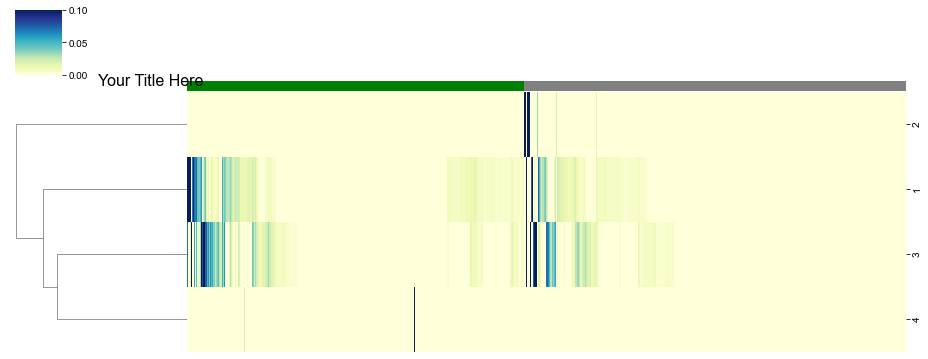

In [49]:
g = sns.clustermap(dfplot2,col_cluster=False,row_cluster=True,col_colors=colorlist,figsize=(13,5),cmap = "YlGnBu",xticklabels=False,vmax = 0.1)
# g.ax_heatmap.set_title("Your Title", fontsize=16)
# g.ax_heatmap.set_xticklabels([])
ax_heatmap = g.ax_heatmap
ax_heatmap.set_title("Your Title Here", fontsize=16)

# 设置标题的位置
ax_heatmap.title.set_position((-0.05, 10))

# plt.savefig("Esr1_dis_all.jpg",dpi = 300)
# plt.savefig("Esr1_dis_all.pdf",dpi = 300)

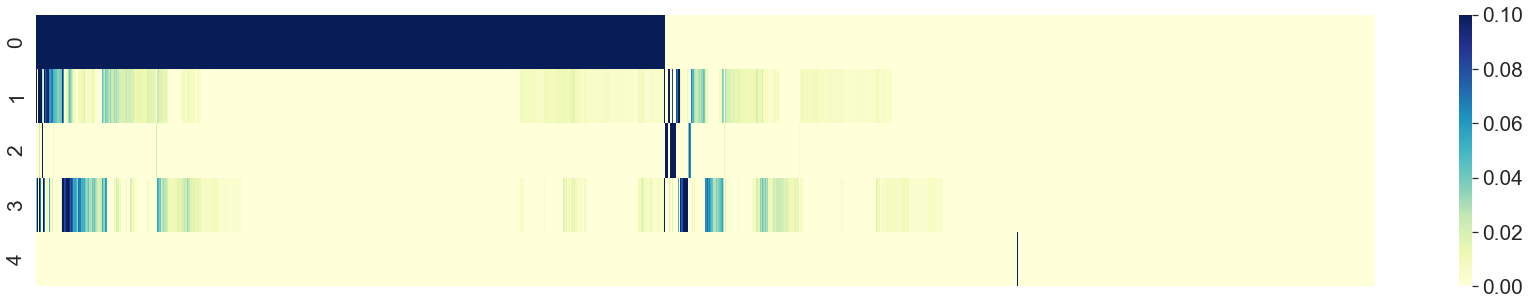

In [28]:
fig, ax = plt.subplots(figsize = (30,5))
sns.set(font_scale=1.9)
sns.heatmap(data = reversed_df.T,
            cmap="YlGnBu",
            # cmap="Reds",
            # cmap="YlOrRd",
            vmin=0,vmax=0.1,
            # linewidths=1, linecolor='white',annot=True,fmt="g"
            xticklabels=False
            )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
# plt.savefig("heatmap_reds.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_YlGnBu.pdf",dpi =600,format="pdf")
# plt.savefig("heatmap_for_geno_no.jpg",dpi =600,format="jpg")